In [1]:
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph

import networkx as nx
%matplotlib inline
phi = DiscreteFactor(['A', 'B'], [2,2], [100, 1, 5, 1000])
print(phi)

+-----+-----+------------+
| A   | B   |   phi(A,B) |
+=====+=====+============+
| A_0 | B_0 |   100.0000 |
+-----+-----+------------+
| A_0 | B_1 |     1.0000 |
+-----+-----+------------+
| A_1 | B_0 |     5.0000 |
+-----+-----+------------+
| A_1 | B_1 |  1000.0000 |
+-----+-----+------------+


In [2]:
print(phi.scope())

['A', 'B']


In [3]:
G = FactorGraph()
G.add_nodes_from(['A', 'B'])
G.add_factors(phi)
G.add_nodes_from([phi])
G.add_edges_from([('A',phi),('B',phi)])
mm = G.to_markov_model()

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


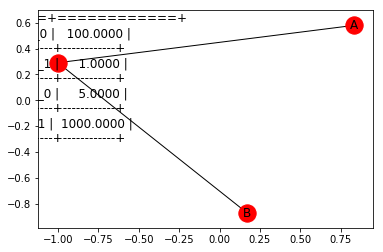

In [4]:
nx.draw_networkx(G,pos=nx.spring_layout(G))

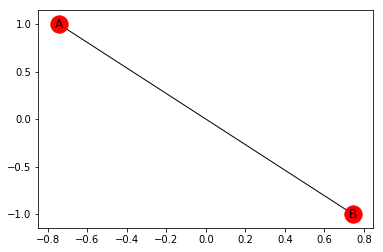

In [5]:
nx.draw_networkx(mm)

In [6]:
partition_function = G.get_partition_function()
print(partition_function)

1106.0


### Marginalization

In [7]:
# Marginalize B: Reduce the scope X to X' = X - B 
phi_marginalized = phi.marginalize(['B'], inplace=False)
print(phi_marginalized.scope())


['A']


In [8]:
print(phi_marginalized)

+-----+-----------+
| A   |    phi(A) |
+=====+===========+
| A_0 |  101.0000 |
+-----+-----------+
| A_1 | 1005.0000 |
+-----+-----------+


In [9]:
phi.marginalize(['A'])
print(phi.scope())

['B']


In [10]:
print(phi)

+-----+-----------+
| B   |    phi(B) |
+=====+===========+
| B_0 |  105.0000 |
+-----+-----------+
| B_1 | 1001.0000 |
+-----+-----------+


### Reduction

In [11]:
# This operation reduce the scope to X - Z, and \phi no longer depends on Z.
phi = DiscreteFactor(['A', 'B'], [2,2], [1000, 1, 5, 100])
phi_reduced = phi.reduce([('B', 0)], inplace=False)
print(phi_reduced)

+-----+-----------+
| A   |    phi(A) |
+=====+===========+
| A_0 | 1000.0000 |
+-----+-----------+
| A_1 |    5.0000 |
+-----+-----------+


In [12]:
print(phi_reduced.scope())

['A']


In [13]:
phi_reduced_a1 = phi.reduce([('A', 1)], inplace=False)
print(phi_reduced_a1)

+-----+----------+
| B   |   phi(B) |
+=====+==========+
| B_0 |   5.0000 |
+-----+----------+
| B_1 | 100.0000 |
+-----+----------+


In [14]:
print(phi_reduced)

+-----+-----------+
| A   |    phi(A) |
+=====+===========+
| A_0 | 1000.0000 |
+-----+-----------+
| A_1 |    5.0000 |
+-----+-----------+


In [15]:
print(phi)

+-----+-----+------------+
| A   | B   |   phi(A,B) |
+=====+=====+============+
| A_0 | B_0 |  1000.0000 |
+-----+-----+------------+
| A_0 | B_1 |     1.0000 |
+-----+-----+------------+
| A_1 | B_0 |     5.0000 |
+-----+-----+------------+
| A_1 | B_1 |   100.0000 |
+-----+-----+------------+


### Product

In [16]:
#The product operation lets us define the factor graph for edges from the factor graph for nodes.
phi1 = DiscreteFactor(['a', 'b'], [2, 2], [1000, 1, 5, 100])
phi2 = DiscreteFactor(['b', 'c'], [2, 2], [1, 100,200, 5])


In [17]:
print(phi1)

+-----+-----+------------+
| a   | b   |   phi(a,b) |
+=====+=====+============+
| a_0 | b_0 |  1000.0000 |
+-----+-----+------------+
| a_0 | b_1 |     1.0000 |
+-----+-----+------------+
| a_1 | b_0 |     5.0000 |
+-----+-----+------------+
| a_1 | b_1 |   100.0000 |
+-----+-----+------------+


In [18]:
print(phi2)

+-----+-----+------------+
| b   | c   |   phi(b,c) |
+=====+=====+============+
| b_0 | c_0 |     1.0000 |
+-----+-----+------------+
| b_0 | c_1 |   100.0000 |
+-----+-----+------------+
| b_1 | c_0 |   200.0000 |
+-----+-----+------------+
| b_1 | c_1 |     5.0000 |
+-----+-----+------------+


In [19]:
phi = phi1 * phi2
print(phi)


+-----+-----+-----+--------------+
| a   | b   | c   |   phi(a,b,c) |
+=====+=====+=====+==============+
| a_0 | b_0 | c_0 |    1000.0000 |
+-----+-----+-----+--------------+
| a_0 | b_0 | c_1 |  100000.0000 |
+-----+-----+-----+--------------+
| a_0 | b_1 | c_0 |     200.0000 |
+-----+-----+-----+--------------+
| a_0 | b_1 | c_1 |       5.0000 |
+-----+-----+-----+--------------+
| a_1 | b_0 | c_0 |       5.0000 |
+-----+-----+-----+--------------+
| a_1 | b_0 | c_1 |     500.0000 |
+-----+-----+-----+--------------+
| a_1 | b_1 | c_0 |   20000.0000 |
+-----+-----+-----+--------------+
| a_1 | b_1 | c_1 |     500.0000 |
+-----+-----+-----+--------------+


In [20]:
# The scope of the new factor contains all three friends.
print(phi.scope())

['a', 'b', 'c']
